## Model 
* Neural Network

In [10]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import utils as np_utils

sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/features_engineered.csv', encoding='utf-8')
df

,SUBJECT_ID,SESSION_ID,TRIAL_ID,c_ml_min_r,c_ml_max_r,c_ml_min_l,c_ml_max_l,c_ap_slope_r,c_ap_slope_l,g_ml_max1_r,...,g_ap_max_l,g_v_max1_r,g_v_min_r,g_v_max2_r,g_v_max1_l,g_v_min_l,g_v_max2_l,AGE,BMI,CLASS_LABEL
0,510,413,1,0.087271,0.118247,0.087814,0.128115,0.001718,0.002493,0.072643,...,0.130772,1.035925,0.818121,0.987930,1.083287,0.796622,1.003385,47,35.538442,C
1,510,413,2,0.085806,0.128396,0.040212,0.083074,0.001589,0.001834,0.072360,...,0.136687,1.009803,0.819649,0.991990,1.018526,0.837006,0.999401,47,35.538442,C
2,510,413,3,0.073788,0.112735,0.049990,0.099952,0.001740,0.001734,0.059417,...,0.143187,1.010970,0.823223,0.989883,1.049092,0.815221,1.003578,47,35.538442,C
3,510,413,4,0.056216,0.102832,0.086729,0.127982,0.001919,0.001361,0.079792,...,0.155758,1.047625,0.797822,1.005463,1.118118,0.773203,1.021851,47,35.538442,C
4,510,413,6,0.064922,0.102404,0.000573,0.052266,0.001837,0.002049,0.059537,...,0.140561,1.044787,0.780821,1.009273,1.084354,0.820851,1.027245,47,35.538442,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75727,93,999910375,6,0.057389,0.081491,-0.007720,-0.005253,0.001445,0.000769,0.027693,...,0.296245,1.227360,0.635865,1.188197,1.210305,0.600266,0.862586,53,21.588183,HC
75728,93,999910375,7,0.060523,0.065029,0.077223,0.107414,0.001117,0.001277,0.069434,...,0.313936,1.360617,0.653168,1.074324,1.195931,0.691509,1.105625,53,21.588183,HC
75729,93,999910375,9,0.068348,0.103938,0.014182,0.031058,0.001457,0.001514,0.042854,...,0.317704,1.220940,0.697688,1.129716,1.132665,0.683090,1.187864,53,21.588183,HC
75730,93,999910375,10,0.032184,0.046935,-0.001137,0.021139,0.001090,0.001431,0.048381,...,0.310775,1.221073,0.704733,1.160231,1.155511,0.767917,1.133180,53,21.588183,HC


In [4]:
df.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

BMI    26992
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(48740, 28)

In [6]:
df.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID', 'c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l', 'AGE', 'BMI', 'CLASS_LABEL'],
      dtype='object')

### Neural Network using 23 engineered features

In [7]:
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
# https://stackoverflow.com/questions/36232334/plotting-3d-decision-boundary-from-linear-svm

In [25]:
df['CLASS_LABEL'].factorize()

(array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
 Index(['C', 'K', 'H', 'A', 'HC'], dtype='object'))

In [28]:
df['CLASS_LABEL'].factorize()[0]

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [29]:
#prepare the data
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y = np_utils.to_categorical(df['CLASS_LABEL'].factorize()[0])
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [32]:
X_train.shape[1]

24

In [47]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(24,), activation='relu'))
#model.add(Dropout(.5))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 24)                600       
                                                                 
 dense_17 (Dense)            (None, 5)                 125       
                                                                 
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

Epoch 1/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2162 - accuracy: 0.4899 - val_loss: 1.2188 - val_accuracy: 0.4833
Epoch 2/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2145 - accuracy: 0.4907 - val_loss: 1.2195 - val_accuracy: 0.4863
Epoch 3/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2141 - accuracy: 0.4918 - val_loss: 1.2236 - val_accuracy: 0.4772
Epoch 4/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2163 - accuracy: 0.4889 - val_loss: 1.2177 - val_accuracy: 0.4902
Epoch 5/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2150 - accuracy: 0.4902 - val_loss: 1.2188 - val_accuracy: 0.4840
Epoch 6/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2150 - accuracy: 0.4905 - val_loss: 1.2299 - val_accuracy: 0.4661
Epoch 7/50
366/366 [==============================] - 1s 3ms/step - loss: 1.2147 - accuracy: 0.4886 - val_loss: 1.2226 - val_accuracy: 0.4677
Epoch 

## Neural Network using original 500 features

In [58]:
%%time
grf_ap_left  = pd.read_csv('..\data\processed\grf_ap_left.csv')
grf_ap_right = pd.read_csv('..\data\processed\grf_ap_right.csv')
grf_ml_left  = pd.read_csv('..\data\processed\grf_ml_left.csv')
grf_ml_right = pd.read_csv('..\data\processed\grf_ml_right.csv')
grf_v_left   = pd.read_csv('..\data\processed\grf_v_left.csv')
grf_v_right  = pd.read_csv('..\data\processed\grf_v_right.csv')
cop_ml_left  = pd.read_csv('..\data\processed\cop_ml_left.csv')
cop_ml_right = pd.read_csv('..\data\processed\cop_ml_right.csv')
cop_ap_left  = pd.read_csv('..\data\processed\cop_ap_left.csv')
cop_ap_right = pd.read_csv('..\data\processed\cop_ap_right.csv')
label = pd.read_csv(r'..\data\GaitRec\GRF_metadata.csv')

CPU times: total: 21 s
Wall time: 24.6 s


In [59]:
grf_ml_left.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,510,413,1,0.000279,-0.003784,-0.005934,-0.009758,-0.011994,-0.021642,-0.024439,...,0.014304,0.011777,0.010456,0.010249,0.008761,0.007923,0.006873,0.007873,0.007996,0.009750
1,510,413,2,-0.005288,-0.010255,-0.010653,-0.015687,-0.017444,-0.029281,-0.035014,...,0.016977,0.015088,0.012544,0.012092,0.010044,0.009551,0.007080,0.008440,0.007129,0.010469
2,510,413,3,-0.011783,-0.012655,-0.016598,-0.026937,-0.030817,-0.046991,-0.055056,...,0.012983,0.011626,0.009716,0.009969,0.008372,0.008422,0.006604,0.008428,0.007492,0.011359
3,510,413,4,-0.003433,-0.011037,-0.015453,-0.026299,-0.038023,-0.052980,-0.056709,...,0.004994,0.005071,0.004526,0.005175,0.004024,0.004686,0.004424,0.006630,0.007030,0.009806
4,510,413,6,-0.010625,-0.011177,-0.017336,-0.023149,-0.027062,-0.046022,-0.052034,...,-0.000069,-0.000660,-0.002057,0.000435,0.000220,0.003197,0.002152,0.006676,0.006989,0.012341


In [77]:
%%time
base = ['SUBJECT_ID','SESSION_ID','TRIAL_ID']
df = cop_ml_right.merge(
    cop_ml_left, on=base,suffixes=['_cmlr','_cmll']).merge(
    cop_ap_right, on=base,suffixes=[None,'_capr']).merge(
    cop_ap_left, on=base,suffixes=[None,'_capl']).merge(
    grf_ml_right, on=base,suffixes=[None,'_gmlr']).merge(
    grf_ml_left, on=base,suffixes=[None,'_gmll']).merge(
    grf_ap_right, on=base,suffixes=[None,'_gapr']).merge(
    grf_ap_left, on=base,suffixes=[None,'_gapl']).merge(
    grf_v_right, on=base,suffixes=[None,'_gvr']).merge(
    grf_v_left, on=base,suffixes=[None,'_gvl']).merge(
    label[['SUBJECT_ID','SESSION_ID','AGE','CLASS_LABEL']], on=['SUBJECT_ID','SESSION_ID'])

CPU times: total: 4.28 s
Wall time: 4.57 s


In [78]:
df

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0_cmlr,1_cmlr,2_cmlr,3_cmlr,4_cmlr,5_cmlr,6_cmlr,...,92_gvl,93_gvl,94_gvl,95_gvl,96_gvl,97_gvl,98_gvl,99_gvl,AGE,CLASS_LABEL
0,510,413,1,0.090489,0.088296,0.090543,0.088585,0.088419,0.087271,0.087643,...,0.322715,0.257800,0.206161,0.157969,0.114536,0.078322,0.051086,0.030038,47,C
1,510,413,2,0.099445,0.085806,0.092521,0.089278,0.092119,0.090495,0.091194,...,0.299658,0.242390,0.193967,0.150712,0.109526,0.073994,0.048843,0.028040,47,C
2,510,413,3,0.080434,0.073788,0.076158,0.074499,0.074923,0.074800,0.075813,...,0.320403,0.257765,0.207438,0.159884,0.116295,0.077046,0.050402,0.028532,47,C
3,510,413,4,0.072603,0.056216,0.062936,0.058685,0.061489,0.060092,0.061455,...,0.305843,0.247477,0.200746,0.153727,0.111913,0.075615,0.050814,0.029449,47,C
4,510,413,6,0.076400,0.064922,0.069484,0.067106,0.067142,0.065643,0.066555,...,0.347770,0.280964,0.226931,0.175726,0.127687,0.084625,0.054879,0.030352,47,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75727,93,999910375,6,0.079767,0.063966,0.057389,0.070820,0.062624,0.066724,0.066109,...,0.728345,0.674503,0.585992,0.506672,0.378240,0.271666,0.131318,0.068635,53,HC
75728,93,999910375,7,0.071751,0.068806,0.060523,0.067541,0.065756,0.068228,0.068960,...,0.446304,0.335178,0.210229,0.135406,0.074887,0.079133,0.040195,0.060160,53,HC
75729,93,999910375,9,0.090892,0.075870,0.068348,0.082233,0.079673,0.079846,0.083529,...,0.499115,0.378566,0.245192,0.146890,0.067128,0.066237,0.035762,0.058333,53,HC
75730,93,999910375,10,0.042685,0.034425,0.034721,0.032184,0.037931,0.036505,0.039742,...,0.417108,0.307411,0.199702,0.131545,0.081470,0.075674,0.053003,0.048931,53,HC


In [79]:
df.to_csv('../data/combined_features.csv', index=False)

In [80]:
df2 = pd.read_csv('../data/combined_features.csv', encoding='utf-8')
df2

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0_cmlr,1_cmlr,2_cmlr,3_cmlr,4_cmlr,5_cmlr,6_cmlr,...,92_gvl,93_gvl,94_gvl,95_gvl,96_gvl,97_gvl,98_gvl,99_gvl,AGE,CLASS_LABEL
0,510,413,1,0.090489,0.088296,0.090543,0.088585,0.088419,0.087271,0.087643,...,0.322715,0.257800,0.206161,0.157969,0.114536,0.078322,0.051086,0.030038,47,C
1,510,413,2,0.099445,0.085806,0.092521,0.089278,0.092119,0.090495,0.091194,...,0.299658,0.242390,0.193967,0.150712,0.109526,0.073994,0.048843,0.028040,47,C
2,510,413,3,0.080434,0.073788,0.076158,0.074499,0.074923,0.074800,0.075813,...,0.320403,0.257765,0.207438,0.159884,0.116295,0.077046,0.050402,0.028532,47,C
3,510,413,4,0.072603,0.056216,0.062936,0.058685,0.061489,0.060092,0.061455,...,0.305843,0.247477,0.200746,0.153727,0.111913,0.075615,0.050814,0.029449,47,C
4,510,413,6,0.076400,0.064922,0.069484,0.067106,0.067142,0.065643,0.066555,...,0.347770,0.280964,0.226931,0.175726,0.127687,0.084625,0.054879,0.030352,47,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75727,93,999910375,6,0.079767,0.063966,0.057389,0.070820,0.062624,0.066724,0.066109,...,0.728345,0.674503,0.585992,0.506672,0.378240,0.271666,0.131318,0.068635,53,HC
75728,93,999910375,7,0.071751,0.068806,0.060523,0.067541,0.065756,0.068228,0.068960,...,0.446304,0.335178,0.210229,0.135406,0.074887,0.079133,0.040195,0.060160,53,HC
75729,93,999910375,9,0.090892,0.075870,0.068348,0.082233,0.079673,0.079846,0.083529,...,0.499115,0.378566,0.245192,0.146890,0.067128,0.066237,0.035762,0.058333,53,HC
75730,93,999910375,10,0.042685,0.034425,0.034721,0.032184,0.037931,0.036505,0.039742,...,0.417108,0.307411,0.199702,0.131545,0.081470,0.075674,0.053003,0.048931,53,HC


In [81]:
df2.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

Series([], dtype: int64)

In [85]:
df2.drop(['SUBJECT_ID','SESSION_ID','TRIAL_ID','AGE','CLASS_LABEL'],axis=1)

,0_cmlr,1_cmlr,2_cmlr,3_cmlr,4_cmlr,5_cmlr,6_cmlr,7_cmlr,8_cmlr,9_cmlr,...,90_gvl,91_gvl,92_gvl,93_gvl,94_gvl,95_gvl,96_gvl,97_gvl,98_gvl,99_gvl
0,0.090489,0.088296,0.090543,0.088585,0.088419,0.087271,0.087643,0.087849,0.089956,0.092254,...,0.479860,0.398704,0.322715,0.257800,0.206161,0.157969,0.114536,0.078322,0.051086,0.030038
1,0.099445,0.085806,0.092521,0.089278,0.092119,0.090495,0.091194,0.090373,0.092704,0.094461,...,0.444697,0.368860,0.299658,0.242390,0.193967,0.150712,0.109526,0.073994,0.048843,0.028040
2,0.080434,0.073788,0.076158,0.074499,0.074923,0.074800,0.075813,0.074868,0.076416,0.079058,...,0.468087,0.389220,0.320403,0.257765,0.207438,0.159884,0.116295,0.077046,0.050402,0.028532
3,0.072603,0.056216,0.062936,0.058685,0.061489,0.060092,0.061455,0.060956,0.064524,0.067032,...,0.450222,0.373759,0.305843,0.247477,0.200746,0.153727,0.111913,0.075615,0.050814,0.029449
4,0.076400,0.064922,0.069484,0.067106,0.067142,0.065643,0.066555,0.065917,0.067778,0.070401,...,0.504436,0.422241,0.347770,0.280964,0.226931,0.175726,0.127687,0.084625,0.054879,0.030352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75727,0.079767,0.063966,0.057389,0.070820,0.062624,0.066724,0.066109,0.069359,0.068571,0.069808,...,0.819970,0.786929,0.728345,0.674503,0.585992,0.506672,0.378240,0.271666,0.131318,0.068635
75728,0.071751,0.068806,0.060523,0.067541,0.065756,0.068228,0.068960,0.071020,0.071391,0.072875,...,0.674128,0.570730,0.446304,0.335178,0.210229,0.135406,0.074887,0.079133,0.040195,0.060160
75729,0.090892,0.075870,0.068348,0.082233,0.079673,0.079846,0.083529,0.085472,0.085939,0.087349,...,0.735133,0.631728,0.499115,0.378566,0.245192,0.146890,0.067128,0.066237,0.035762,0.058333
75730,0.042685,0.034425,0.034721,0.032184,0.037931,0.036505,0.039742,0.039536,0.040125,0.039007,...,0.660927,0.548321,0.417108,0.307411,0.199702,0.131545,0.081470,0.075674,0.053003,0.048931


In [86]:
#prepare the data
X= df2.drop(['SUBJECT_ID','SESSION_ID','TRIAL_ID','AGE','CLASS_LABEL'],axis=1)
y= np_utils.to_categorical(df2['CLASS_LABEL'].factorize()[0])
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [99]:
X_train.shape

(56799, 1000)

In [96]:
def Neural_Network_Classifier():
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_shape=(1000,), activation='relu'))
    #model.add(Dropout(.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
    return model

In [97]:
Neural_Network_Classifier().summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_27 (Dense)            (None, 5)                 5005      
                                                                 
Total params: 1,006,005
Trainable params: 1,006,005
Non-trainable params: 0
_________________________________________________________________


In [137]:
from keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn=Neural_Network_Classifier, 
                                 epochs=10, 
                                 batch_size=100, 
                                 validation_data=(X_test, y_test),
                                 verbose=0)

In [138]:
pl = Pipeline(steps=[('preprocessing', StandardScaler()),
                     ('neural_network', classifier)])

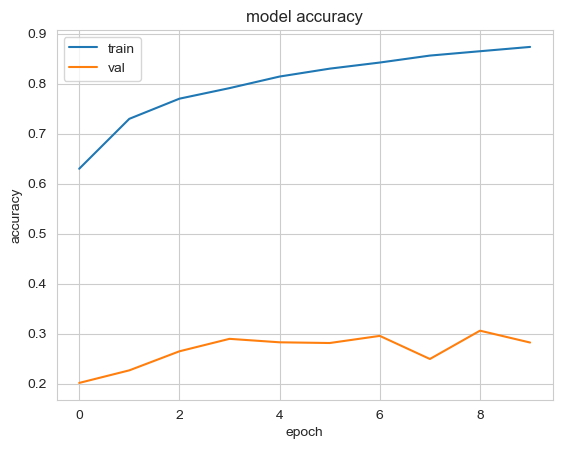

CPU times: total: 50.2 s
Wall time: 1min 14s


In [140]:
%%time
history = pl.fit(X_train,y_train)
plt.plot(history.steps[1][1].model.history.history['accuracy'])
plt.plot(history.steps[1][1].model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [142]:
history

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('neural_network',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B889048B50>)])

In [141]:
history.steps[1][1].model.history.history

{'loss': [0.9677632451057434,
  0.6969851851463318,
  0.6115425825119019,
  0.5639422535896301,
  0.4996863305568695,
  0.46768638491630554,
  0.43386682868003845,
  0.39788565039634705,
  0.37477046251296997,
  0.35541272163391113],
 'accuracy': [0.6299406886100769,
  0.7297839522361755,
  0.7700839638710022,
  0.7911934852600098,
  0.8143629431724548,
  0.8301378488540649,
  0.8423563838005066,
  0.856282651424408,
  0.8649800419807434,
  0.8735893368721008],
 'val_loss': [1.5817646980285645,
  1.652761459350586,
  1.6531349420547485,
  1.5972634553909302,
  1.5969440937042236,
  1.6607439517974854,
  1.5745359659194946,
  1.6259301900863647,
  1.7553786039352417,
  2.2418088912963867],
 'val_accuracy': [0.2016584873199463,
  0.22679977118968964,
  0.264881432056427,
  0.2898114323616028,
  0.2828923165798187,
  0.28146621584892273,
  0.29572704434394836,
  0.24951143562793732,
  0.30613213777542114,
  0.2824169397354126]}

In [143]:
history.score(X_test, y_test)

0.8411239385604858